#Airline Passenger Satisfaction

In [6]:
# ========================================
#  Import Libraries
# ========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# ========================================
#  Kaggle API Setup & Dataset Download
# ========================================
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d teejmahal20/airline-passenger-satisfaction
!unzip "*.zip"

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
License(s): other
  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 618MB/s]
Archive:  airline-passenger-satisfaction.zip
  inflating: test.csv                
  inflating: train.csv               


In [10]:

# -----------------------------
# Load Dataset
# -----------------------------
data=pd.read_csv("/content/train.csv")

In [11]:
# -----------------------------
# Data Info & Summary
# -----------------------------
print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [12]:
# -----------------------------
# Handle Missing Data
# -----------------------------
arrival_avg = data['Arrival Delay in Minutes'].mean()
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(arrival_avg)

In [13]:
# -----------------------------
# Drop Unnecessary Columns
# -----------------------------
data_cleaned = data.drop(["Unnamed: 0", "id"], axis=1)

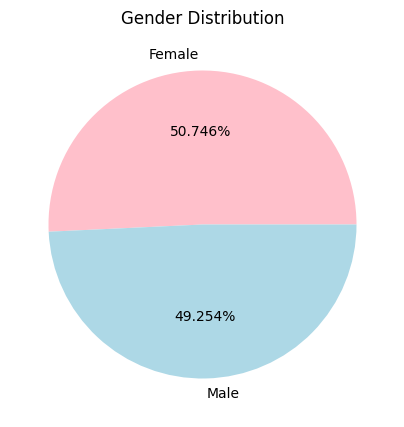

In [14]:
# -----------------------------
# Gender Distribution
# -----------------------------
total_gen = data_cleaned['Gender'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(total_gen, labels=total_gen.index, autopct="%1.3f%%", colors=["pink","lightblue"])
plt.title("Gender Distribution")
plt.show()

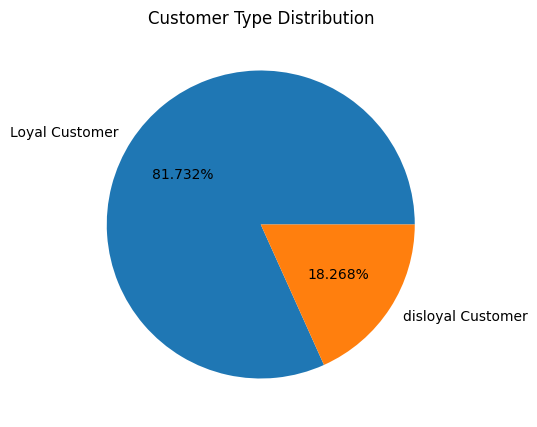

In [15]:
# -----------------------------
# Customer Type Distribution
# -----------------------------
total_type_customer = data_cleaned['Customer Type'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(total_type_customer, labels=total_type_customer.index, autopct="%1.3f%%")
plt.title("Customer Type Distribution")
plt.show()

Age
Child          15191
Young_Adult    33226
Adult          34813
Middle_Aged    19301
Senior          1373
Name: count, dtype: int64


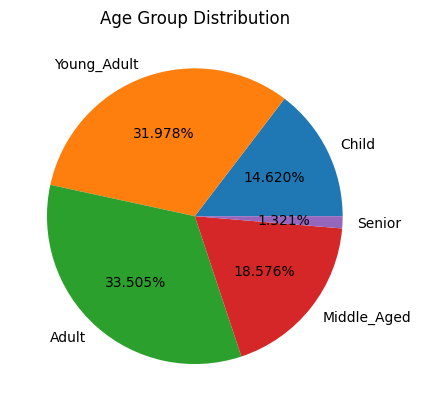

In [17]:
# -----------------------------
# Age Categorization
# -----------------------------
cat_age=pd.cut(data['Age'],bins=5,labels=["Child","Young_Adult","Adult","Middle_Aged","Senior"])

total_cat_age=cat_age.value_counts().sort_index() #sorted the data by the index
print(total_cat_age)
#lable automatically by  (.index)
plt.pie(total_cat_age,labels=total_cat_age.index,autopct="%1.3f%%")
plt.title("Age Group Distribution")
plt.show()


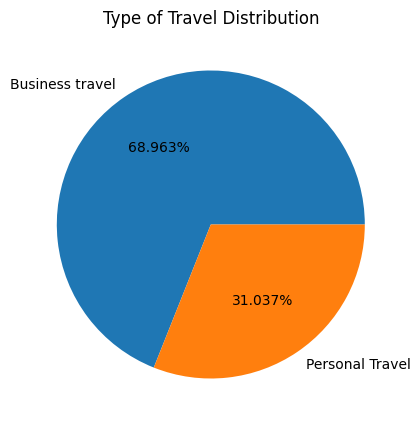

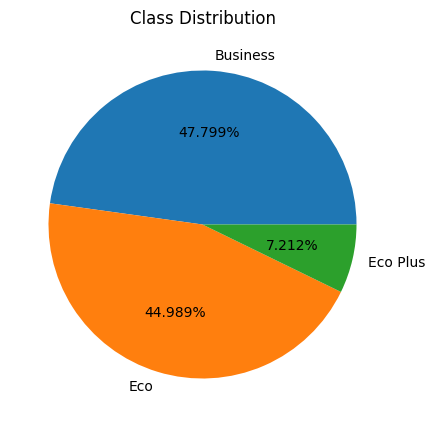

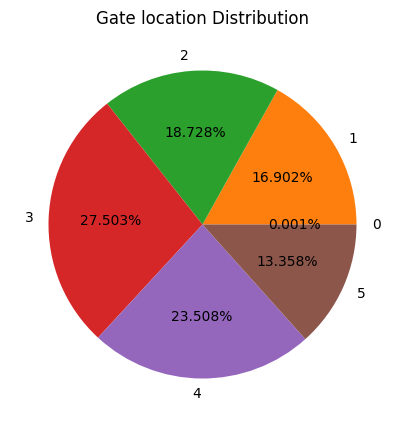

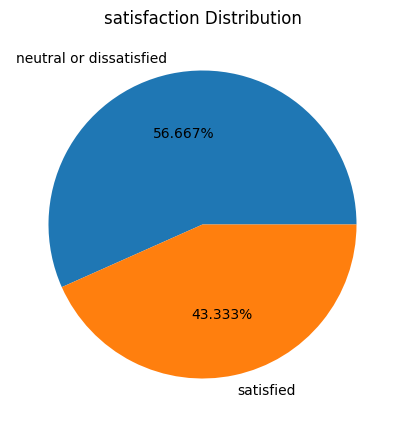

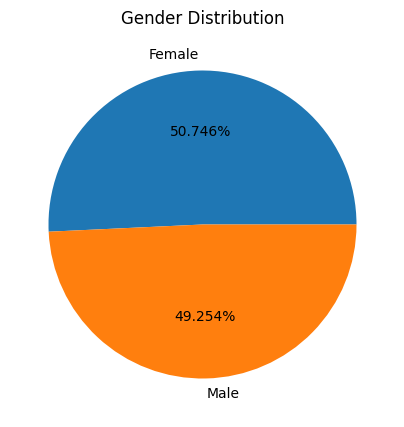

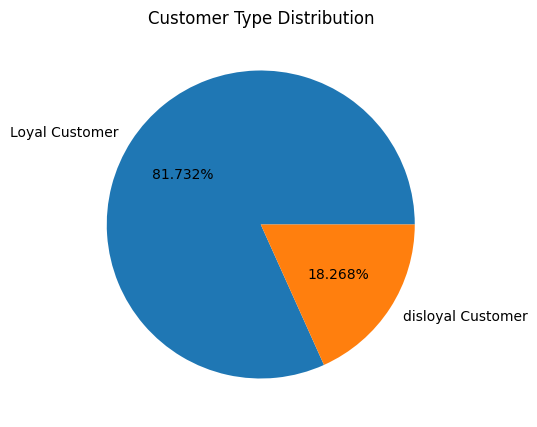

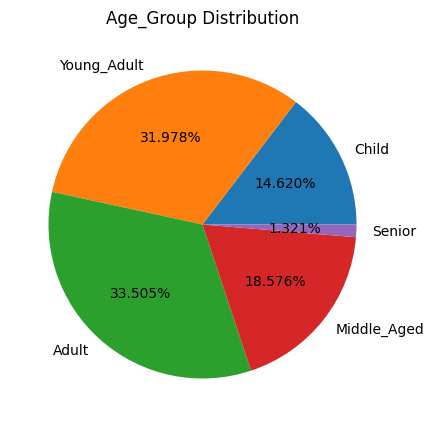

In [18]:
# -----------------------------
# Type of Travel & Class
# -----------------------------
def pie_maker(df, cols):
    for col in cols:
        y = df[col].value_counts().sort_index()
        plt.figure(figsize=(5,5))
        plt.pie(y, labels=y.index, autopct="%1.3f%%")
        plt.title(f"{col} Distribution")
        plt.show()

pie_maker(data_cleaned, ["Type of Travel", "Class", "Gate location", "satisfaction", "Gender", "Customer Type", "Age_Group"])


In [19]:



# -----------------------------
# Satisfaction Analysis
# -----------------------------
obj_cols = data_cleaned.select_dtypes(exclude="number").columns

for col in obj_cols:
    print(f"\n\n=== Analysis by {col} ===\n")
    for val in data_cleaned[col].value_counts().sort_index().index:
        total = (data_cleaned[col] == val).sum()
        satisfied = ((data_cleaned["satisfaction"] == "satisfied") & (data_cleaned[col] == val)).sum()
        neutral_or_dissatisfied = ((data_cleaned["satisfaction"] == "neutral or dissatisfied") & (data_cleaned[col] == val)).sum()
        print(f"{val}: Total={total}, Satisfied={satisfied} ({(satisfied/total)*100:.2f}%), Neutral/Dissatisfied={neutral_or_dissatisfied} ({(neutral_or_dissatisfied/total)*100:.2f}%)")




=== Analysis by Gender ===

Female: Total=52727, Satisfied=22534 (42.74%), Neutral/Dissatisfied=30193 (57.26%)
Male: Total=51177, Satisfied=22491 (43.95%), Neutral/Dissatisfied=28686 (56.05%)


=== Analysis by Customer Type ===

Loyal Customer: Total=84923, Satisfied=40533 (47.73%), Neutral/Dissatisfied=44390 (52.27%)
disloyal Customer: Total=18981, Satisfied=4492 (23.67%), Neutral/Dissatisfied=14489 (76.33%)


=== Analysis by Type of Travel ===

Business travel: Total=71655, Satisfied=41746 (58.26%), Neutral/Dissatisfied=29909 (41.74%)
Personal Travel: Total=32249, Satisfied=3279 (10.17%), Neutral/Dissatisfied=28970 (89.83%)


=== Analysis by Class ===

Business: Total=49665, Satisfied=34480 (69.43%), Neutral/Dissatisfied=15185 (30.57%)
Eco: Total=46745, Satisfied=8701 (18.61%), Neutral/Dissatisfied=38044 (81.39%)
Eco Plus: Total=7494, Satisfied=1844 (24.61%), Neutral/Dissatisfied=5650 (75.39%)


=== Analysis by satisfaction ===

neutral or dissatisfied: Total=58879, Satisfied=0 (0.